In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def display_image(title, image, cmap=None):
    plt.figure(figsize=(6,6))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:
image = cv2.imread('data/Picture1.jpg')
color_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## Task 2: Discrete Fourier Transform (FFT) and Inverse FFT (IFFT)

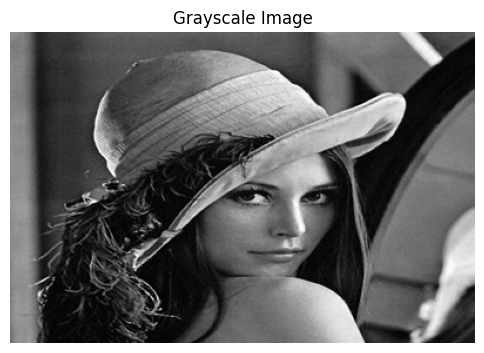

In [5]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display_image("Grayscale Image", gray_image, cmap='gray')

In [6]:
dft = cv2.dft(np.float32(gray_image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

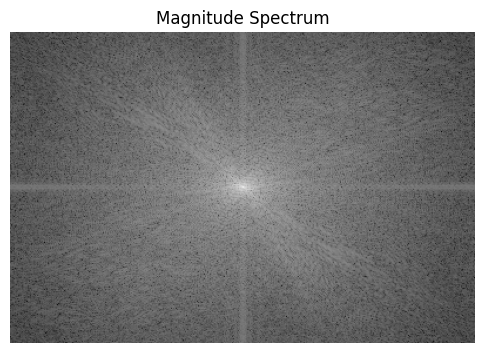

In [7]:
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
display_image("Magnitude Spectrum", magnitude_spectrum, cmap='gray')

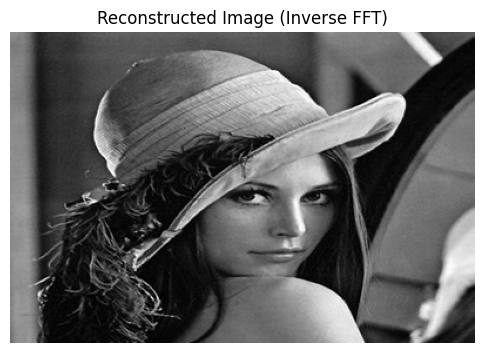

In [8]:
# 2. Inverse Fourier Transform (Reconstruct the image)
f_ishift = np.fft.ifftshift(dft_shift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
display_image("Reconstructed Image (Inverse FFT)", img_back, cmap='gray')


In [9]:

# Rotate the image by 45 degrees
(h, w) = gray_image.shape
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_image = cv2.warpAffine(gray_image, rotation_matrix, (w, h))

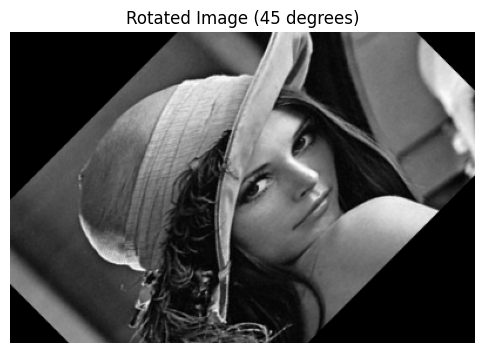

In [10]:
# Display the rotated image
display_image("Rotated Image (45 degrees)", rotated_image, cmap='gray')

# Compute FFT of the rotated image
dft_rotated = cv2.dft(np.float32(rotated_image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift_rotated = np.fft.fftshift(dft_rotated)
magnitude_spectrum_rotated = 20 * np.log(cv2.magnitude(dft_shift_rotated[:,:,0], dft_shift_rotated[:,:,1]))

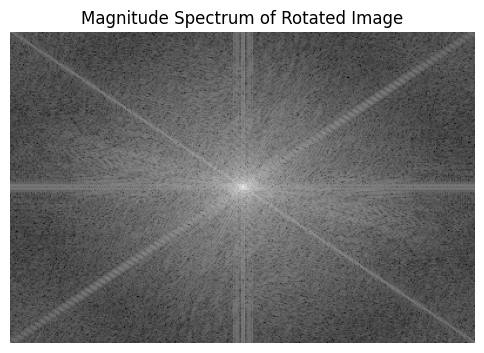

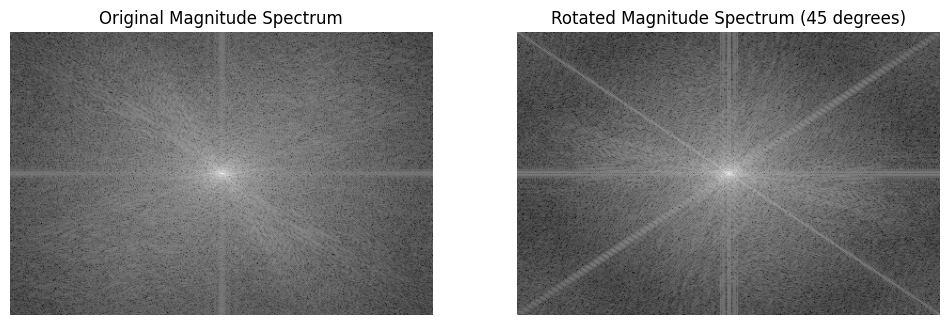

In [11]:
# Display magnitude spectrum of rotated image
display_image("Magnitude Spectrum of Rotated Image", magnitude_spectrum_rotated, cmap='gray')

# Compare original and rotated magnitude spectra
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(magnitude_spectrum, cmap='gray')
ax[0].set_title("Original Magnitude Spectrum")
ax[0].axis('off')

ax[1].imshow(magnitude_spectrum_rotated, cmap='gray')
ax[1].set_title("Rotated Magnitude Spectrum (45 degrees)")
ax[1].axis('off')

plt.show()